In [1]:
from functools import wraps
import time

def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'@timeit: {func.__name__}{args} {kwargs} Took {(total_time*1e3):.4f} milliseconds')
        return result, total_time
    return timeit_wrapper

## "Algorithmus": Aneinanderketten von Strings

In [2]:
@timeit
def repeat1(c: str, n: int):
    answer = ""
    for i in range(n):
        answer += c
    return answer

@timeit
def repeat2(c: str, n: int):
    answer = []
    for i in range(n):
        answer.append(c)
    return "".join(answer)

@timeit
def repeat3(c: str, n: int):
    return c * n

In [3]:
ns = [int(n * 1e3) for n in [50, 100, 200, 400, 800, 1600, 3200]]

time1 = []
time2 = []
time3 = []
for n in ns:
    result1, t1 = repeat1("x", n)
    time1.append(t1 * 1e3)

    result2, t2 = repeat2("x", n)
    time2.append(t2 * 1e3)

    result3, t3 = repeat3("x", n)
    time3.append(t3 * 1e3)

    #Verify all results are identical
    assert result1 == result2 == result3
    print(10*"-")

@timeit: repeat1('x', 50000) {} Took 13.3898 milliseconds
@timeit: repeat2('x', 50000) {} Took 7.3311 milliseconds
@timeit: repeat3('x', 50000) {} Took 0.0070 milliseconds
----------
@timeit: repeat1('x', 100000) {} Took 29.5226 milliseconds
@timeit: repeat2('x', 100000) {} Took 12.2869 milliseconds
@timeit: repeat3('x', 100000) {} Took 0.0076 milliseconds
----------
@timeit: repeat1('x', 200000) {} Took 33.9161 milliseconds
@timeit: repeat2('x', 200000) {} Took 18.9173 milliseconds
@timeit: repeat3('x', 200000) {} Took 0.0635 milliseconds
----------
@timeit: repeat1('x', 400000) {} Took 72.0439 milliseconds
@timeit: repeat2('x', 400000) {} Took 27.2819 milliseconds
@timeit: repeat3('x', 400000) {} Took 0.1344 milliseconds
----------
@timeit: repeat1('x', 800000) {} Took 111.2646 milliseconds
@timeit: repeat2('x', 800000) {} Took 60.6270 milliseconds
@timeit: repeat3('x', 800000) {} Took 0.0352 milliseconds
----------
@timeit: repeat1('x', 1600000) {} Took 269.0329 milliseconds
@timeit

Text(0.5, 1.0, 'Time complexity of string concatenation')

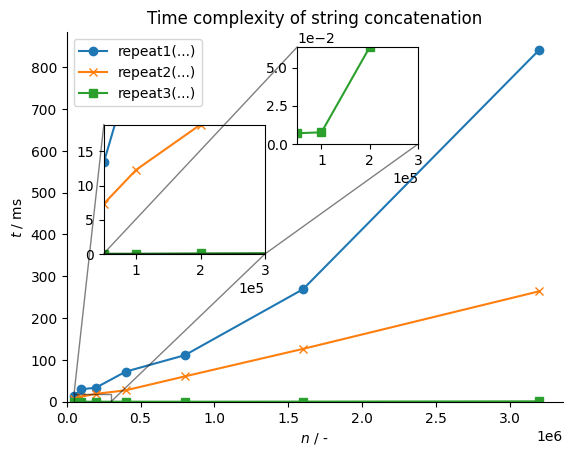

In [16]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(ns, time1, 'o-', label="repeat1(...)")
ax.plot(ns, time2, 'x-', label="repeat2(...)")
ax.plot(ns, time3, 's-', label="repeat3(...)")
ax.spines[['right', 'top']].set_visible(False)

axin = ax.inset_axes([0.075, 0.40, 0.325, 0.35])
axin.plot(ns, time1, 'o-', label="repeat1(...)")
axin.plot(ns, time2, 'x-', label="repeat2(...)")
axin.plot(ns, time3, 's-', label="repeat3(...)")
inset_plot_lim = 3e5
axin.set_xlim(min(ns), inset_plot_lim)

idx = np.abs(np.array(ns) - inset_plot_lim).argmin() # find index of element closest to 1024
axin.set_ylim(0, time2[idx])
axin.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax.indicate_inset_zoom(axin, edgecolor="black")

axinin = axin.inset_axes([1.2, 0.85, 0.75, 0.75])
axinin.plot(ns, time1, 'o-', label="repeat1(...)")
axinin.plot(ns, time2, 'x-', label="repeat2(...)")
axinin.plot(ns, time3, 's-', label="repeat3(...)")
ininset_plot_lim = 3e5
axinin.set_xlim(min(ns), ininset_plot_lim)

inidx = np.abs(np.array(ns) - ininset_plot_lim).argmin() # find index of element closest to 1024
axinin.set_ylim(0, time3[inidx])
axinin.ticklabel_format(axis="both", style="sci", scilimits=(0,0))
axin.indicate_inset_zoom(axinin, edgecolor="black")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.legend()
ax.set_xlabel("$n$ / -")
ax.set_ylabel("$t$ / ms")
ax.set_title("Time complexity of string concatenation")